## Data Science Nigeria 2019 Challenge- Insurance Prediction

## DESCRIPTION 
This challenge was designed by Data Science Nigeria specifically for the DSN Bootcamp 2018, which takes place 19-24 November 2019. Welcome to the DSN participants!

After the Bootcamp, this competition will remain open to allow others in the Zindi community to learn and test their skills.

## CHALLENGE :

Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.

You have been appointed as the Lead Data Analyst to build a predictive model to determine if a building will have an insurance claim during a certain period or not. You will have to predict the probability of having at least one claim over the insured period of the building.

The model will be based on the building characteristics. 

The target variable, Claim, is a:

1 if the building has at least a claim over the insured period.
0 if the building doesn’t have a claim over the insured period.

### Variable	Description

**Customer Id**:	Identification number for the Policy holder

**YearOfObservation**:	year of observation for the insured policy

**Insured_Period**:	duration of insurance policy in Olusola Insurance. (Ex: Full year insurance, Policy Duration = 1; 6 months = 0.5

**Residential**	is the building a residential building or not

**Building_Painted**	is the building painted or not (N-Painted, V-Not Painted)

**Building_Fenced**	is the building fence or not (N-Fenced, V-Not Fenced)

**Garden**	building has garden or not (V-has garden; O-no garden)

**Settlement**	Area where the building is located. (R- rural area; U- urban area)

**Building Dimension**	Size of the insured building in m2

**Building_Type**	The type of building (Type 1, 2, 3, 4)

**Date_of_Occupancy**	date building was first occupied

**NumberOfWindows**	number of windows in the building

**Geo Code**	Geographical Code of the Insured building

**Claim**	target variable. (0: no claim, 1: at least one claim over insured period).


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv('C:\\Users\\Okwua\\Insurance Prediction\\train_data.csv')
test=pd.read_csv('C:\\Users\\Okwua\\Insurance Prediction\\test_data.csv')
Sub=pd.read_csv('C:\\Users\\Okwua\\Insurance Prediction\\sample_submission.csv')

In [3]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [5]:
train.columns = train.columns.str.replace(' ','_')
test.columns = test.columns.str.replace(' ','_')
Sub.columns=Sub.columns.str.replace(' ','_')

In [6]:
train.columns 

Index(['Customer_Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [7]:
print(train.shape, test.shape, Sub.shape)

(7160, 14) (3069, 13) (3068, 2)


In [8]:
#find the column not common to both data frame
common = test.merge(Sub, on=["Customer_Id"])
result = test[~test.Customer_Id.isin(common.Customer_Id)]
result

,Customer_Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
907,H12607,2014,1.0,0,N,V,V,U,1500.0,2,1960.0,.,13210


In [9]:
test = test.drop(labels=907, axis=0)

In [10]:
test.shape

(3068, 13)

In [11]:
test.head()

,Customer_Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [12]:
Sub.head()

,Customer_Id,Claim
0,H0,1
1,H10000,1
2,H10001,1
3,H10002,1
4,H10003,1


In [13]:
train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)

In [14]:
# Drop Geo_Code column due to erroneous values which may not be sensible to fill
train.drop(['Geo_Code','Customer_Id', 'NumberOfWindows'], axis=1, inplace=True)
test.drop(['Geo_Code','Customer_Id','NumberOfWindows'], axis=1, inplace=True)

In [15]:
# forward fill the variable 'Garden'
train['Garden'] = train['Garden'].ffill()
test['Garden'] = test['Garden'].ffill()

In [16]:
# print the sum of null values in both dataframes 
print(test.isna().sum().sum())
print(train.isna().sum().sum())

0
0


In [17]:
features=['Building_Painted','Building_Fenced', 'Garden', 'Settlement']  
train=pd.get_dummies(train,columns=features,drop_first=True)
test=pd.get_dummies(test,columns=features,drop_first=True)


In [18]:
test.dtypes

YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
Building_Painted_V      uint8
Building_Fenced_V       uint8
Garden_V                uint8
Settlement_U            uint8
dtype: object

In [19]:
train.head()

,YearOfObservation,Insured_Period,Residential,Building_Dimension,Building_Type,Date_of_Occupancy,Claim,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U
0,2013,1.0,0,290.0,1,1960.0,0,0,1,1,1
1,2015,1.0,0,490.0,1,1850.0,0,1,0,0,0
2,2014,1.0,0,595.0,1,1960.0,0,0,1,1,1
3,2013,1.0,0,2840.0,1,1960.0,0,1,1,1,1
4,2014,1.0,0,680.0,1,1800.0,0,1,0,0,0


In [20]:
# move tagret column to last position 
new_cols = [col for col in train.columns if col != 'Claim'] + ['Claim']
train= train[new_cols]
train

,YearOfObservation,Insured_Period,Residential,Building_Dimension,Building_Type,Date_of_Occupancy,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U,Claim
0,2013,1.000000,0,290.0,1,1960.0,0,1,1,1,0
1,2015,1.000000,0,490.0,1,1850.0,1,0,0,0,0
2,2014,1.000000,0,595.0,1,1960.0,0,1,1,1,0
3,2013,1.000000,0,2840.0,1,1960.0,1,1,1,1,0
4,2014,1.000000,0,680.0,1,1800.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7155,2012,1.000000,1,1083.0,1,2001.0,1,1,1,1,0
7156,2013,1.000000,0,1083.0,2,1980.0,1,1,1,1,1
7157,2016,0.038251,0,1083.0,1,1992.0,1,1,1,1,0
7158,2013,1.000000,0,1083.0,1,1972.0,1,1,1,1,0


In [21]:
X=train.iloc[:,:-1] ## independent features
y=train.iloc[:,-1] ## dependent features

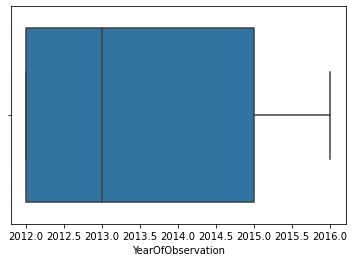

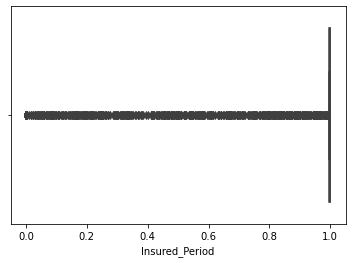

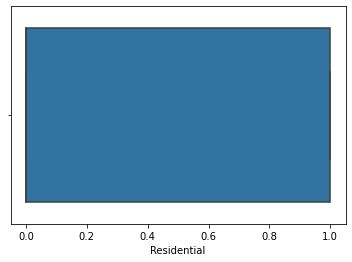

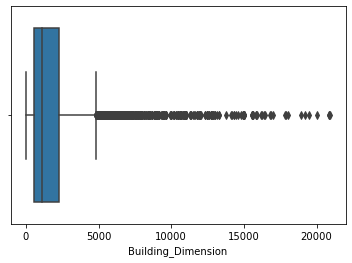

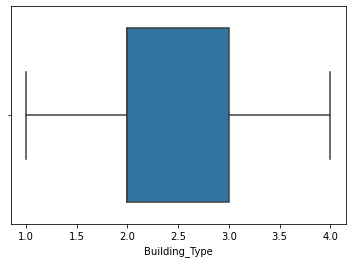

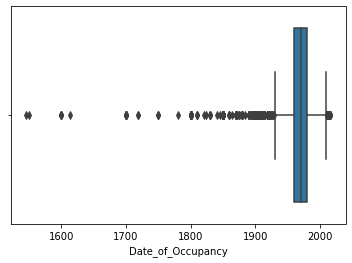

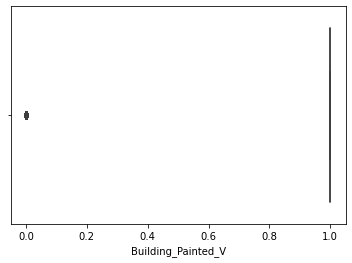

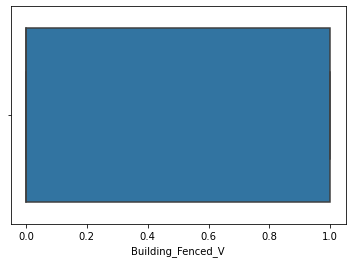

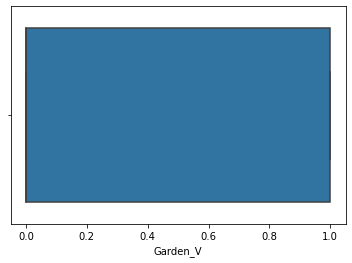

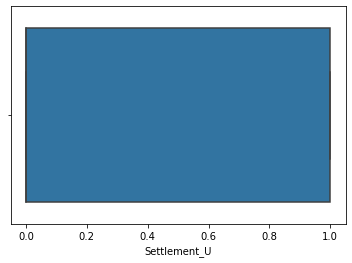

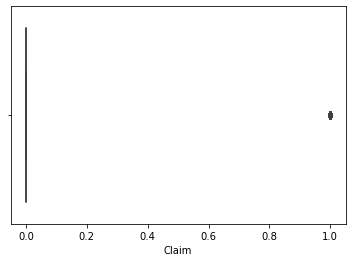

In [22]:
for column in train.columns:
    plt.figure()             
    sns.boxplot(train[column])

In [23]:
scaler_x=StandardScaler()
X_scaled=scaler_x.fit(X)
X_scaled=scaler_x.transform(X)




In [24]:
X_scaled, y

(array([[-0.48389585,  0.3764189 , -0.66315517, ...,  1.00785206,
          1.00728913,  1.0084153 ],
        [ 0.96153355,  0.3764189 , -0.66315517, ..., -0.99220912,
         -0.99276361, -0.99165493],
        [ 0.23881885,  0.3764189 , -0.66315517, ...,  1.00785206,
          1.00728913,  1.0084153 ],
        ...,
        [ 1.68424825, -3.63523127, -0.66315517, ...,  1.00785206,
          1.00728913,  1.0084153 ],
        [-0.48389585,  0.3764189 , -0.66315517, ...,  1.00785206,
          1.00728913,  1.0084153 ],
        [ 0.23881885,  0.3764189 , -0.66315517, ...,  1.00785206,
          1.00728913,  1.0084153 ]]),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 7155    0
 7156    1
 7157    0
 7158    0
 7159    0
 Name: Claim, Length: 7160, dtype: int64)

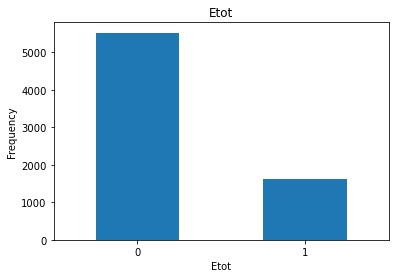

In [25]:
#plot of histogram to reveal imbalance in target class
count_revenue=pd.value_counts(y, sort = True)
count_revenue.plot(kind= 'bar', rot=0)
plt.title('Etot')
plt.xticks(range(2), )
plt.xlabel('Etot')
plt.ylabel('Frequency')
plt.show()

In [26]:
#oversampling 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter 
os=RandomOverSampler(1.0)
X1, y1=os.fit_resample(X_scaled,y)
print("The number of classes after fit {}".format(Counter(y1)))


The number of classes after fit Counter({0: 5526, 1: 5526})


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2, random_state=1)

## RANDOM FOREST 

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
cl=RandomForestClassifier().fit(X_train,y_train)

In [30]:
pred=cl.predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[ 891  204]
 [  56 1060]]
0.8824061510628675
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1095
           1       0.84      0.95      0.89      1116

    accuracy                           0.88      2211
   macro avg       0.89      0.88      0.88      2211
weighted avg       0.89      0.88      0.88      2211



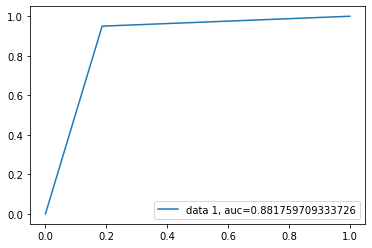

In [31]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Predicting  unseen data 

In [32]:
missing =test.iloc[[907]]
missing

,YearOfObservation,Insured_Period,Residential,Building_Dimension,Building_Type,Date_of_Occupancy,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U
908,2014,1.0,1,500.0,2,1960.0,0,1,1,1


In [33]:
miss=cl.predict(missing)
miss

array([1], dtype=int64)

In [34]:
scaler_x=StandardScaler()
Test_scaled=scaler_x.fit(test)
Test_scaled=scaler_x.transform(test)


In [35]:
y_hat=cl.predict(Test_scaled)

In [36]:
y_hat.shape

(3068,)

In [37]:
Sub.shape

(3068, 2)

In [38]:
Sub['Claim']=y_hat

In [39]:
Sub.head()

,Customer_Id,Claim
0,H0,0
1,H10000,0
2,H10001,0
3,H10002,0
4,H10003,0


In [41]:
Sub.to_csv('sub_output.csv', index=False)